## Importing the libraries and reading the csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"D:\DATA SCIENCE\NEW\NEW_AQI.csv")

In [3]:
dataset.head()

,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,01-01-2017,61.25,100.46,39.37,0.25,6.08,69.11,110
1,02-01-2017,47.21,80.12,52.00,0.33,20.73,47.61,103
2,03-01-2017,65.45,132.09,58.68,0.31,22.99,50.37,103
3,04-01-2017,116.03,197.89,58.20,0.15,37.31,56.42,215
4,05-01-2017,96.21,162.27,57.60,0.00,25.88,45.66,276


In [4]:
dataset.isnull().sum()

Date     0
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [5]:
dataset.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,41.573024,92.438644,32.106528,0.481810,8.652181,34.632835,97.900079
std,21.570828,44.242006,13.560882,0.268225,5.640045,13.831671,38.196944
min,5.560000,10.540000,7.090000,0.000000,1.660000,9.290000,29.000000
25%,23.040000,56.685000,21.820000,0.280000,5.280000,24.390000,66.000000
50%,39.470000,88.670000,30.370000,0.490000,6.860000,32.530000,95.000000
75%,58.350000,126.785000,41.400000,0.670000,9.910000,44.235000,125.000000
max,158.040000,485.880000,73.320000,1.450000,70.390000,98.750000,281.000000


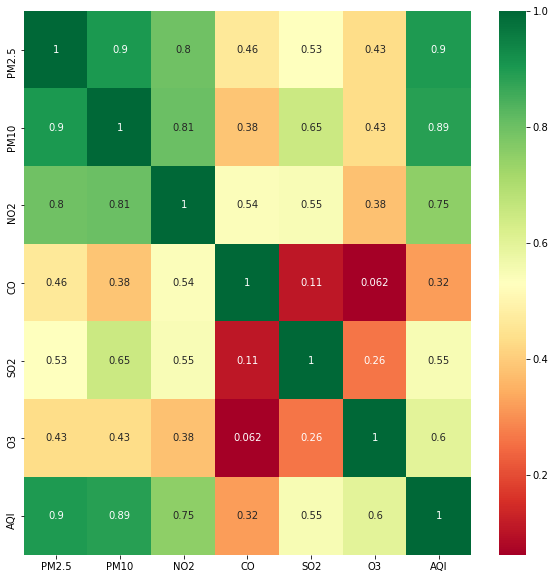

In [6]:
corrmat = dataset.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,10))
corrmap = sns.heatmap(dataset[corr_features].corr(),annot=True, cmap="RdYlGn")

## Splitting Independent and Dependent Variables

In [7]:
x = dataset.iloc[:,1:7]
x

,PM2.5,PM10,NO2,CO,SO2,O3
0,61.25,100.46,39.37,0.25,6.08,69.11
1,47.21,80.12,52.00,0.33,20.73,47.61
2,65.45,132.09,58.68,0.31,22.99,50.37
3,116.03,197.89,58.20,0.15,37.31,56.42
4,96.21,162.27,57.60,0.00,25.88,45.66
...,...,...,...,...,...,...
1266,23.29,44.20,22.64,0.36,5.39,24.22
1267,15.80,32.18,22.73,0.36,6.36,22.25
1268,20.24,44.74,27.59,0.38,6.29,19.98
1269,19.38,41.95,24.58,0.39,5.30,17.40


In [8]:
y = dataset.iloc[:,7].astype(int)
y

0       110
1       103
2       103
3       215
4       276
       ... 
1266     58
1267     49
1268     47
1269     46
1270     48
Name: AQI, Length: 1271, dtype: int32

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

In [10]:
etr = ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

In [11]:
print(etr.feature_importances_)

[0.3898812  0.28510807 0.16113218 0.03907081 0.03213938 0.09266837]


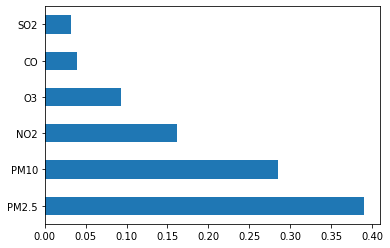

In [12]:
feature = pd.Series(etr.feature_importances_,index=x.columns)
feature.nlargest(6).plot(kind="barh")

## Train and Test Splits

In [13]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import *

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

## Building XGBoost Model

In [15]:
xgbreg=xgb.XGBRegressor()

In [16]:
xgbreg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
y_pred_train=xgbreg.predict(x_train)
y_pred=xgbreg.predict(x_test)

In [18]:
r2_score(y_train,y_pred_train)

0.9992835121207723

In [19]:
r2_score(y_test,y_pred)

0.8812050645739368

## We can clearly observe that the model has Over Fitting, so we need to perform Hyper Parameter Tuning.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [21]:
# no of trees in RF
n_estimators=list(np.linspace(start=100,stop=800,num=8,dtype="int"))

#various learning rate parameters
learning_rate=['0.05','0.1','0.2','0.3','0.4']

# max no of levels of tree
max_depth=np.linspace(5,20,num=4,dtype="int")

#subsample parameter values( Subsample ratio of the training instance.)
subsample =[0.7,0.8,0.9]

#minimum child weight parameters(Minimum sum of instance weight(hessian) needed in a child)
min_child_weight=[3,4,5,6]

In [22]:
# creating param grid
param_grid= {"n_estimators":n_estimators,
            "learning_rate":learning_rate,
             "max_depth":max_depth,
             "subsample":subsample,
             "min_child_weight":min_child_weight}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.4'], 'max_depth': array([ 5, 10, 15, 20]), 'subsample': [0.7, 0.8, 0.9], 'min_child_weight': [3, 4, 5, 6]}


In [23]:
xgboost_model = Pipeline(steps=[('Scaler',MinMaxScaler()),('Regressor',GridSearchCV(xgb.XGBRegressor(),param_grid=param_grid,scoring='r2', n_jobs=4, cv=5, verbose=3))])

In [24]:
xgboost_model.fit(x_train,y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   29.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   57.9s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 2040 tasks      | elapsed: 12.2min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 14.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 17.5min
[Parallel(n_jobs=4)]: Done 3864 tasks      | elapsed: 22.4min
[Parallel(n_jobs=4)]: Done 4600 tasks      | elapsed: 24.4min
[Parallel(n_jobs=4)]: Done 5400 tasks      | elapsed: 29.1min
[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed: 33.2min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 37.2min


Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('Regressor',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     min_child_weight=

In [25]:
type(xgboost_model)

sklearn.pipeline.Pipeline

In [26]:
y_pred_train = xgboost_model.predict(x_train)

In [27]:
y_pred = xgboost_model.predict(x_test)

In [28]:
r2_score(y_train, y_pred_train)

0.9669104418082772

In [29]:
r2_score(y_test, y_pred)

0.9017089634336816

## Saving the model

In [30]:
import joblib

In [31]:
joblib.dump(xgboost_model,"xgboostAQImodel.pkl")

['xgboostAQImodel.pkl']

In [108]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 8.658785714285715
MSE: 171.92589714285714
RMSE: 13.112051599305776


In [111]:
print('MAE:',metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE: 2.8565085771947527
MSE: 16.596788496468218
RMSE: 4.07391562215864


### After performing the Hyper-Parameter tuning we got training r2_score of 96.69% and test r2_score of 90.17%.